In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
%matplotlib inline

In [13]:
import h5py
import numpy as np

def load_dataset():
    train = h5py.File("train_catvnoncat.h5", "r")  
    test = h5py.File("test_catvnoncat.h5", "r")  

    trainX_org = np.array(train["train_set_x"][:])  
    trainY_org = np.array(train["train_set_y"][:])  
    testX_org = np.array(test["test_set_x"][:])
    testY_org = np.array(test["test_set_y"][:]) 
    classes = np.array(test["list_classes"][:])  
    
    # Reshaping 
    trainY_org = trainY_org.reshape((1, trainY_org.shape[0]))  
    testY_org = testY_org.reshape((1, testY_org.shape[0]))

    return trainX_org, trainY_org, testX_org, testY_org, classes

trainX_org, trainY_org, testX_org, testY_org , classes = load_dataset()

(1, 209)


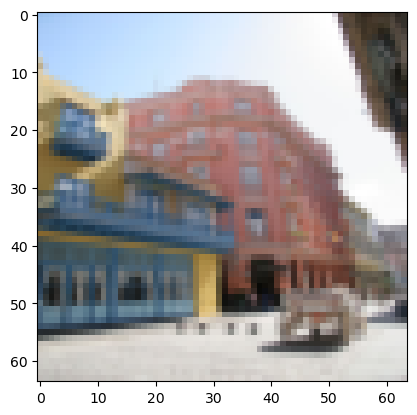

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [61]:
image = trainX_org[23]
#print(image)
print(trainY_org.shape)
plt.imshow(image)
plt.show()
print(trainY_org)

In [15]:
trainXFlatten = trainX_org.reshape(trainX_org.shape[0] , -1).T
testXFlatten = testX_org.reshape(testX_org.shape[0] , -1).T

In [16]:
print(testXFlatten.shape)

(12288, 50)


In [63]:
train_set_x = trainXFlatten/255.
test_set_x = testXFlatten/255.

[0.40784314 0.43137255 0.99215686 0.99607843 0.28235294 0.20784314
 1.         0.94901961 0.09411765 0.84705882 0.14117647 1.
 0.07058824 0.91764706 0.5254902  0.91764706 0.20392157 0.50588235
 0.45882353 0.38823529 0.67058824 0.07843137 0.64705882 1.
 0.28235294 0.52156863 0.80392157 0.27843137 0.44705882 0.09019608
 0.04705882 0.14117647 0.03137255 0.73333333 0.91764706 0.39215686
 0.43137255 0.32156863 0.75686275 0.05490196 0.47843137 0.43529412
 0.30588235 0.14117647 0.1254902  0.18431373 0.58823529 0.18431373
 0.07058824 0.63921569]


In [18]:
def sigmoid(z):
    return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))  


In [65]:
def initWeight(dim):
    w = np.zeros([dim,1])
    b = 0
    return w , b
print(initWeight(5))

(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 0)


In [67]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.matmul(w.T , X) + b)
    cost = -1/m*np.sum(Y*np.log(A)+ (1-Y)*np.log(1-A))
    #backprop
    dw = (1/m) * (np.matmul(X , (A-Y).T))
    db = (1/m)*np.sum(A-Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost 

In [71]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
                  "b": b}
        
    grads = {"dw": dw,
                 "db": db}
        
    return params, grads, costs


In [22]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.matmul(w.T, X)+ b) 
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i]< 0.5:
            Y_prediction[0,i] = 0
        else: 
            Y_prediction[0,i] = 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [69]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initWeight(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [25]:
d = model(train_set_x, trainY_org, test_set_x, testY_org, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
